# Dragon Curve
The dragon curve is a fractal that can be generated by iteratively folding a piece of paper in half, and then unfolding it such that each fold is a 90 degree angle.

This implementation codes the path of the paper as a string of numbers that represent the directions. The iterate_by_copy method works by taking the existing pattern, copying it, rotating the copy by 90 degrees, and then prepending it to the unrotated copy.

The goal of this implementation is to be able to display what the fractal looks like after any number of iterations. The normal dragon curve is created under the assumption that the folds are always in the same direction, but this does not need to be the case. It can also alternate folding directions, which results in a simple triangle.

In [6]:
# Authored by Bryce Burgess
# Dragon curve fractal
# note: it can always be translated into a line
# never doubles back on itself
# need to establish origin(s)

import matplotlib.pyplot as plt
import math


This is the fractal class, containing the string encoding, the map for numbers and direction, and the method to iterate through folds and display the string.

In [24]:

class Fractal():
    def __init__(self, start_seg_list = "0", pattern = "left"):
        self.seg_list_old = start_seg_list
        self.seg_list_new = "0"
        #  3  2  1
        #   \ | /
        #  4- . -0 number corresponds to direction
        #   / | \
        #  5  6  7
        self.dictionary = ["0","1","2","3","4","5","6","7"]
        
        # how to fold TODO implement later
        self.pattern = pattern #"alternate", "right"
        if self.pattern == "left" or self.pattern =="alternate":
            self.fold_left = True
        elif self.pattern == "right":
            self.fold_left = False
            
    # Method 1 iterates by copying the previous fractal, rotating the copy, and concatenating it
    def iterate_by_copy(self, itr = 1):
        rotate_left = self.fold_left

        for j in range(itr):
            self.rotate_copy_fractal_90(rotate_left = rotate_left)

            self.seg_list_old = self.seg_list_new

            # doesn't seem to work
            if self.pattern == "alternate":
               rotate_left = not rotate_left

    def rotate_copy_fractal_90 (self, rotate_left = True):
        self.seg_list_copy = ""
        if rotate_left:
            rotation_direction = 2
        else:
            rotation_direction = -2
        
        try:
            # write the new list
            for c in self.seg_list_old:
                for j in range(len(self.dictionary)):
                    if c == self.dictionary[j]:
                        self.seg_list_copy += self.dictionary[(j-rotation_direction)%8]
            
            # reverse order of new list (prepare for prepending)
            self.seg_list_copy = self.seg_list_copy[::-1]
        
        except:
            print("error, bad character in string")
            self.seg_list_copy = ""
            
        self.seg_list_new = self.seg_list_copy + self.seg_list_old
    
    def iterate_by_splits(self, n_folds):
        ls = "0"*(2**n_folds)
        mid = len(ls)/2

        # after folding original paper n times, there are 2^n total folds in paper
        fold_locs = []
        for i in range(2**n_folds):
            fold_locs.append(i * len(ls))

        
                        
    def display1(self):
        
        scale_width = 1            

        seg_length = 1
        x = [0]
        y = [0]
        for c in self.seg_list_new:            
            if c == "0":
                x.append(x[-1] + seg_length*1)
                y.append(y[-1])
                
                scale_width += 1
                
            if c == "1":
                x.append(x[-1] + seg_length*0.7)
                y.append(y[-1] + seg_length*0.7)
            
            if c == "2":
                x.append(x[-1])
                y.append(y[-1] + seg_length*1)
            
            if c == "3":
                x.append(x[-1] - seg_length*0.7)
                y.append(y[-1] + seg_length*0.7)
            
            if c == "4":
                x.append(x[-1] - seg_length*1)
                y.append(y[-1])
                
                scale_width -= 1


            if c == "5":
                x.append(x[-1] - seg_length*0.7)
                y.append(y[-1] - seg_length*0.7)
            
            if c == "6":
                x.append(x[-1])
                y.append(y[-1] - seg_length*1)
            
            if c == "7":
                x.append(x[-1] + seg_length*0.7)
                y.append(y[-1] - seg_length*0.7)
        
        
        x = [i/scale_width for i in x]
        y = [i/scale_width for i in y]
        # line from (x_old, y_old) to (x,y)
        plt.plot(x, y,"-")

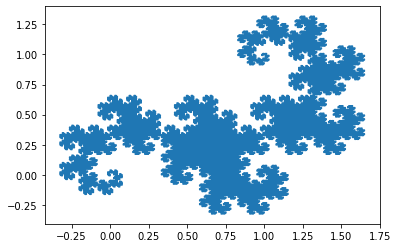

In [25]:
f = Fractal()

f.iterate_by_copy(itr=15)
f.display1()